# **Save this file as studentid1_studentid2_lab#.ipynb**
(Your student-id is the number shown on your student card.)

E.g. if you work with 3 people, the notebook should be named:
12301230_3434343_1238938934_lab1.ipynb.

**This will be parsed by a regexp, so please double check your filename.**

Before you turn this problem in, please make sure everything runs correctly. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your names and email adresses below.**



In [1]:
NAME = "George Chouliaras"
NAME2 = "Jonathan Jeroen Beekman"
NAME3 = ""
EMAIL = "g.chouliaras@student.vu.nl"
EMAIL2 = ""
EMAIL3 = ""

---

# Lab 1: Linear Regression and Overfitting

### Machine Learning 1, September 2017

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact your teaching assistant.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.
* use the provided test boxes to check if your answers are correct

In [2]:
%pylab inline
plt.rcParams["figure.figsize"] = [20,10]

Populating the interactive namespace from numpy and matplotlib


$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

### 1.1. Generate periodic data (5 points)
Write a method `gen_cosine(N)` that generates toy data like in fig 1.2 of Bishop's book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = \cos(x_i)$ and the standard deviation $\sigma = 0.2$.


In [3]:
def gen_cosine(n):
    #create vector x with evenly spaced values in [0,2*pi]
    x = np.linspace(0, (2* np.pi), num = n, endpoint = True);
    
    #create vector which is sampled from normal distributed data with mean cos(x) and sd = 0.2
    mu = np.cos(x);
    t = np.random.normal(loc = mu, scale = 0.2, size = n)
    return x, t


In [4]:
### Test your function
np.random.seed(5)
N = 10
x, t = gen_cosine(N)

assert x.shape == (N,), "the shape of x is incorrect"
assert t.shape == (N,), "the shape of t is incorrect"


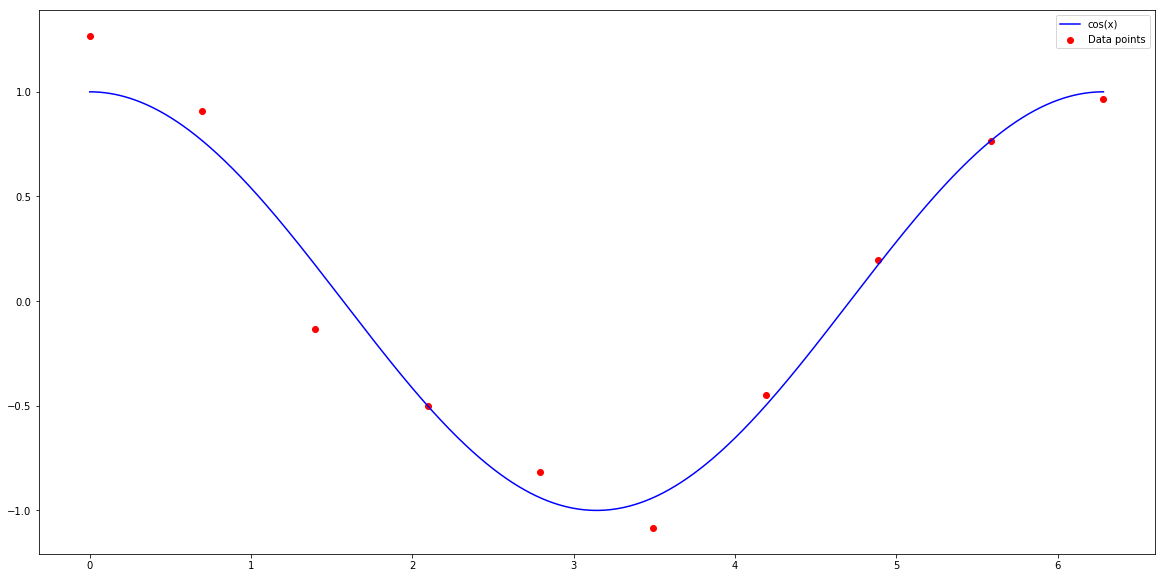

In [5]:
fig, ax = plt.subplots();
seed = np.random.seed(10)

#plot the data for N = 10
x_p = np.linspace(0, (2* np.pi), num = 1000, endpoint = True);


x, t = gen_cosine(10)
plt.scatter(x,t, label = 'Data points',color = 'red')
plt.plot(x_p,np.cos(x_p), label = 'cos(x)', color = 'blue')
plt.legend();
plt.show()

### 1.2 Polynomial regression (10 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in Bishop's book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates, as well as the _feature matrix_ $\bPhi$.

In [6]:
def designmatrix(x, M): # it is highly recommended to write a helper function that computes Phi
    
    #for polynomial regression the basis functions take the form of powers of x: phi_j(x) = x^j
    #create empty matrix for Phi with size: (number of data points) x (order of polynomial + 1) 
    Phi = np.empty([len(x),M+1]);
    for i in range(0,(len(x))):
        for j in range(0,M+1):
            #fill in the design matrix
            Phi[i,j] = x[i]**j;
    return Phi       
        

def fit_polynomial(x, t, M):
    Phi = designmatrix(x,M);
    P = np.linalg.inv(np.dot(Phi.T,Phi));
    
    #By taking the derivative of E(w) with respect to w and setting to 0, we find the w_ml
    w_ml = np.dot(np.dot(P,Phi.T),t);
    
    return w_ml, Phi


In [7]:
### Test your function
N = 10
x = np.square((np.linspace(-1, 1, N)))
t = 0.5*x + 1.5
m = 2
w, Phi = fit_polynomial(x,t,m)

assert w.shape == (m+1,), "The shape of w is incorrect"
assert Phi.shape == (N, m+1), "The shape of Phi is incorrect"


### 1.3 Plot (5 points)
Sample a dataset with $N=10$, and fit four polynomials with $M \in (0, 2, 4, 8)$.
For each value of $M$, plot the prediction function, along with the data and the original cosine function. The resulting figure should look similar to fig 1.4 of the Bishop's book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

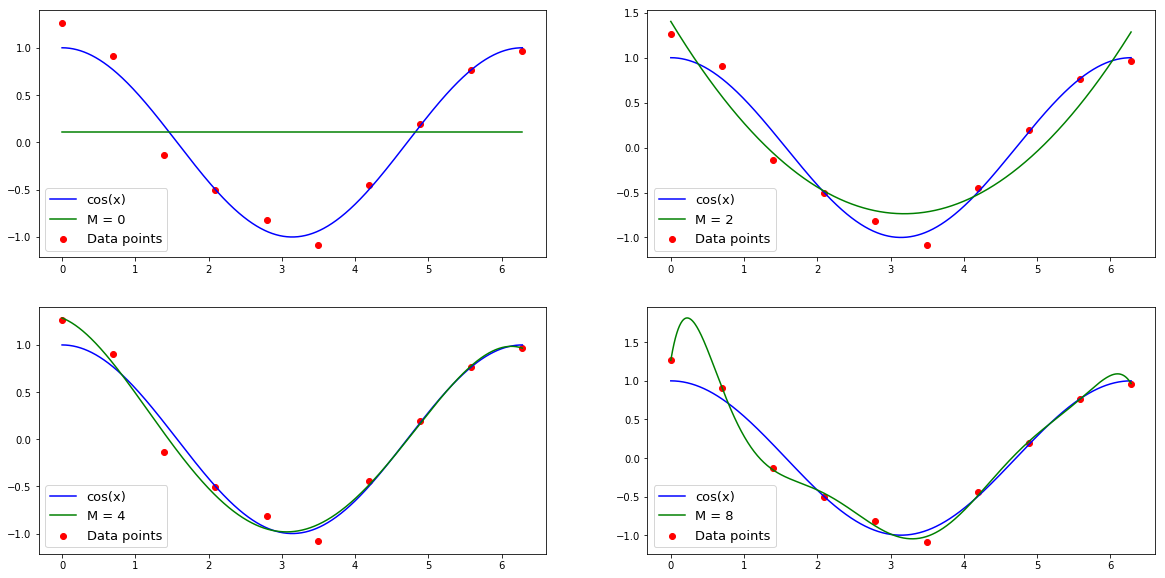

In [8]:
#We first create a function that builds the polynomial
def poly(x,M,w):
    p=0;
    for i in range(0,M+1):
        p = p + w[i]*x**i
    return p


np.random.seed(10)

fig, ax = plt.subplots(2,2,sharex = True, sharey =True);

N = 10;
M = [0,2,4,8];

#sample 10 data points using the gen_cosine function that we built earlier
x, t = gen_cosine(N);
#create an x to get smooth plots
x_p = np.linspace(0, (2* math.pi), num = 1000, endpoint = True);




#ind gives the index of M vector and j gives the value of the jth object of M vector
for ind,j in enumerate(M):
    #we use the fit_polynomial to find the w_ml
    w,Phi = fit_polynomial(x,t,j)
    #create empty matrix for the polynomial
    p = np.empty([len(x_p)]);
    for i in range(0,len(x_p)):
        p[i] = poly(x_p[i],j,w);
    
    #subplots: plt.subplot(2,2,1), plt.subplot(2,2,2),....
    plt.subplot(2,2,ind+1)
    plt.scatter(x,t, label = 'Data points',color = 'red')
    plt.plot(x_p,np.cos(x_p), label = 'cos(x)', color = 'blue')
    plt.plot(x_p,p, label = 'M = ' + str(j), color = 'green')
    plt.legend(fontsize = 13);
    

plt.show()

### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the periodic data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of Bishop's book.

The function should return $\bw$ and $\bPhi$.

In [9]:
def fit_polynomial_reg(x, t, m, lamb):
    Phi = designmatrix(x,m);
    P = np.linalg.inv(lamb * np.identity(m+1) + np.dot(Phi.T,Phi));
    
    #By taking the derivative of E(w) with respect to w and setting to 0, we find the w_ml
    w_ml = np.dot(np.dot(P,Phi.T),t);
    
    return w_ml, Phi


In [10]:
### Test your function
N = 10
x = np.square((np.linspace(-1, 1, N)))
t = 0.5*x + 1.5
m = 2
lamb = 0.1
w, Phi = fit_polynomial_reg(x,t,m, lamb)

assert w.shape == (m+1,), "The shape of w is incorrect"
assert Phi.shape == (N, m+1), "The shape of w is incorrect" 







### 1.5 Model selection by cross-validation (15 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=10$ datapoints generated with `gen_cosine(20)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you use $K=5$ folds.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

a) (5 points) First of all, write a method `pred_error(x_train, x_valid, t_train, t_valid, M, lamb)` that compares the prediction of your method `fit_polynomial_reg` for a given set of parameters $M$ and $\lambda$ to `t_valid`. It should return the prediction error for a single fold.

In [11]:
def pred_error(x_train, x_valid, t_train, t_valid, M, reg):
    #find the coefficients of w_ml for the training data
    w, _ = fit_polynomial_reg(x_train,t_train,M,reg);
    
    #find the prediction error on the test set by using the best parameters found in training
    Phi = designmatrix(x_valid,M)
    
    #We need the regularization term only for the training, in order to prevent overfitting.
    #for our prediction error (testing), we use the penalty without the regularization term!
    pred_err = 0.5 * np.dot((np.dot(Phi,w) - t_valid).transpose(),np.dot(Phi,w) - t_valid) 


    return pred_err


In [12]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.5*np.square(x) + 1.5
M = 2
reg = 0.1
pred_err = pred_error(x[:-2], x[-2:], t[:-2], t[-2:], M, reg)

assert pred_err < 0.01, "pred_err is too big"


b) (10 points) Now write a method find_best_m_and_lamb(x, t) that finds the best values for $M$ and $\lambda$. The method should return the best $M$ and $\lambda$. To get you started, here is a method you can use to generate indices of cross-validation folds.

In [13]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = [int(i) for i in np.floor(np.linspace(0,N,k+1))]
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds


In [14]:
def find_best_m_and_lamb(x, t):
    M = [i for i in range(0,11)];
    lamb = [exp(1)**i for i in range(-10,1)]
    k = 5
    N = 10
    
    #obtain indices for training and validation folds
    train, valid = kfold_indices(N,k);
    #initialize lowest error
    l_err = 1;
    for m in M:
        for l in lamb:
            pred_err = np.empty(k);  
            for fold in range(k):
            
                x_train = x[train[fold]];
                x_valid = x[valid[fold]];
                t_train = t[train[fold]];
                t_valid = t[valid[fold]];
                
                pred_err[fold] = pred_error(x_train, x_valid, t_train, t_valid, m, l)
            
            #compute the average error over all k folds
            avg_err = np.mean(pred_err)
            #if the error is lower than the current lowest error, then this becomes the new lowest error
            if (avg_err < l_err):
                l_err = avg_err;
                M_best = m;
                lamb_best = l;
                
    
    return M_best, lamb_best


In [15]:
### If you want you can write your own test here

In [16]:
np.random.seed(10)
x, t = gen_cosine(10);

M_best, lamb_best = find_best_m_and_lamb(x,t)

print('The best M is: ' + str(M_best));
print('The best lambda is: '+ str(lamb_best));

The best M is: 4
The best lambda is: 0.0183156388887


### 1.7 Plot best cross-validated fit (5 points)

For some dataset with $N = 10$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. In addition, the plot should show the dataset itself and the function that we try to approximate. Let the plot make clear which $M$ and $\lambda$ were found.

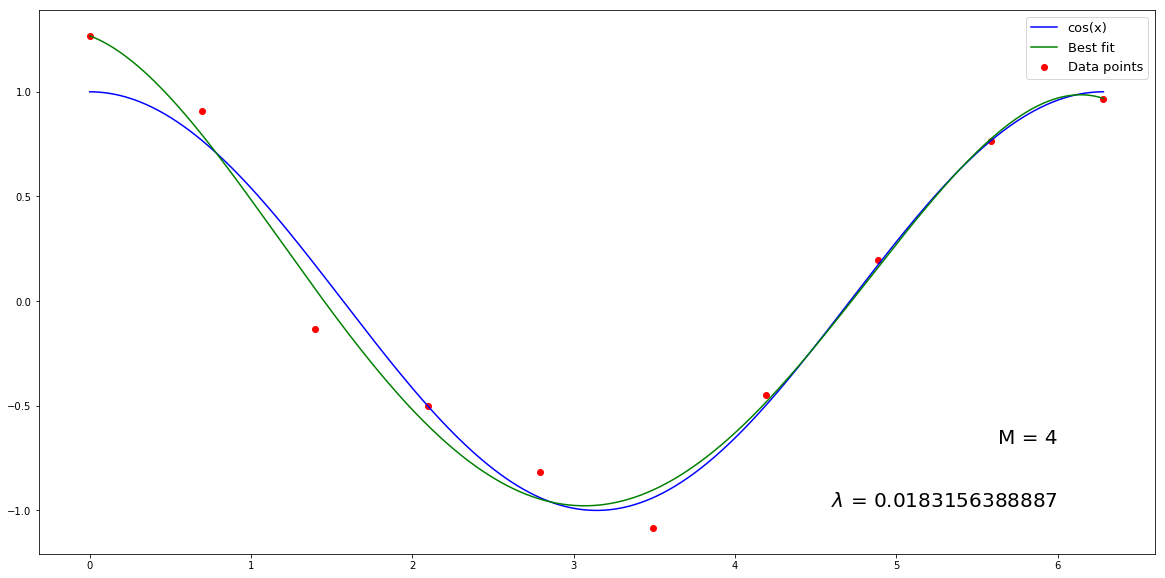

In [17]:
np.random.seed(10);


#generate data points
x,t = gen_cosine(10);
#find best M and Lambda
M_best, lamb_best = find_best_m_and_lamb(x,t)

#find best coefficients w
w,_ = fit_polynomial_reg(x,t,M_best,lamb_best)

#create polynomials using the best coefficients    
p = [poly(x_p[i],M_best,w) for i in range(len(x_p))]


#Figure
plt.scatter(x,t, label = 'Data points',color = 'red')
plt.plot(x_p,np.cos(x_p), label = 'cos(x)', color = 'blue')
plt.plot(x_p,p, label = 'Best fit', color = 'green')

plt.annotate('M = ' + str(M_best), xy = (6,-0.7) ,ha = 'right', va = 'bottom', size = 20)
plt.annotate('$\lambda$ = ' + str(lamb_best), xy = (6,-1) ,ha = 'right', va = 'bottom', size = 20)

plt.legend(fontsize = 13);
plt.show();

## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Cosine 2 (5 points)

Write a function `gen_cosine2(N)` that behaves identically to `gen_cosine(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

In [18]:
def gen_cosine2(n):
    
    #draw samples from uniform distribution
    x = np.random.uniform(0, 2* np.pi,size = n)
    
    #create vector which is sampled from normal distributed data with mean cos(x) and sd = 0.2
    mu = np.cos(x);
    t = np.random.normal(loc = mu, scale = 0.2, size = n)
    
    return x, t



In [19]:
### Test your function
np.random.seed(5)
N = 10
x, t = gen_cosine2(N)

assert x.shape == (N,), "the shape of x is incorrect"
assert t.shape == (N,), "the shape of t is incorrect"


### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the periodic data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial. In addition it should return the design matrix $\bPhi$. The arguments `x`, `t` and `M` have the same meaning as in question 1.2.

In [20]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    Phi = designmatrix(x,M);
    P = np.dot(Phi.T,Phi)
    S = np.linalg.inv(alpha * np.identity(M+1) + beta * P)
    m = beta * np.dot(np.dot(S,Phi.T),t)
    
    return m, S, Phi


In [21]:
### Test your function
N = 10
x = np.linspace(-1, 1, N)
t = 0.5*np.square(x) + 1.5
M = 2
alpha = 0.5
beta = 25
m, S, Phi = fit_polynomial_bayes(x, t, M, alpha, beta)

assert m.shape == (M+1,), "the shape of m is incorrect" 
assert S.shape == (M+1, M+1), "the shape of S is incorrect"
assert Phi.shape == (N, M+1), "the shape of Phi is incorrect"


### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean, variance and design matrix $\bPhi$ given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [22]:
def predict_polynomial_bayes(x, m, S, beta):
    #In order to create the design matrix, we need the order M of the polynomial. 
    #We know that the length of the posterior mean vector is M+1, hence we can find the order as: M = len(m) - 1
    #Alternatively, we can find the order using the length of matrix S
    M = len(m) - 1;
    Phi = designmatrix(x,M);
    
    sigma = np.empty(len(x))
    mean = np.empty(len(x))
    #We create a loop in order to multiply each row of Phi matrix with the rest of the quantities
    for i in range(len(x)):
        sigma[i] = 1/beta + np.dot(np.dot(Phi[i].T,S), Phi[i])
        mean[i] = np.dot(m.T,Phi[i])
 
    
    return mean, sigma, Phi


In [23]:
### Test your function
np.random.seed(5)
N = 10
x = np.linspace(-1, 1, N)
m = np.empty(3)
S = np.empty((3, 3))
beta = 25
mean, sigma, Phi = predict_polynomial_bayes(x, m, S, beta)

assert mean.shape == (N,), "the shape of mean is incorrect"
assert sigma.shape == (N,), "the shape of sigma is incorrect"
assert Phi.shape == (N, m.shape[0]), "the shape of Phi is incorrect"


### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 10 datapoints with `gen_cosine2(10)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=4$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.


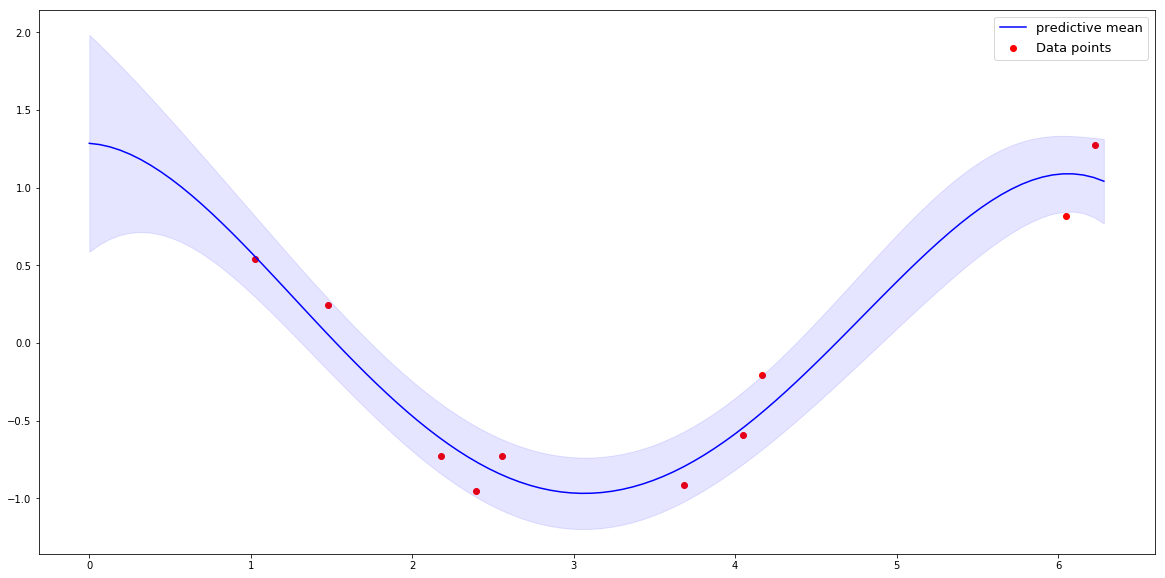

In [24]:
np.random.seed(30)

N = 10
M = 4
alpha = 1/2
beta = 1/(0.2**2)

#generate data points
x,t = gen_cosine2(N)

#create x for plotting
x_p = np.linspace(0, (2* math.pi), num = 100, endpoint = True);


#find posterior mean and variance for the Mth order polynomial
m, S, _ = fit_polynomial_bayes(x, t, M, alpha, beta);

#Use the posterior mean and variance to find the predictive mean and variance for all points in x_p
mean, sigma, _ = predict_polynomial_bayes(x_p, m, S, beta)


#plot the data points
plt.scatter(x,t, label = 'Data points',color = 'red');

#plot the predictive mean
plot(x_p,mean, label = 'predictive mean', color = 'blue')

#insert the shaded area with the standard deviation around the mean
plt.fill_between(x_p,mean-(np.sqrt(sigma)),mean+(np.sqrt(sigma)),alpha = 0.1,color = 'blue')

plt.legend(fontsize = 13);


b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 4-th order polynomial regression. 
Display each of these 100 polynomials.


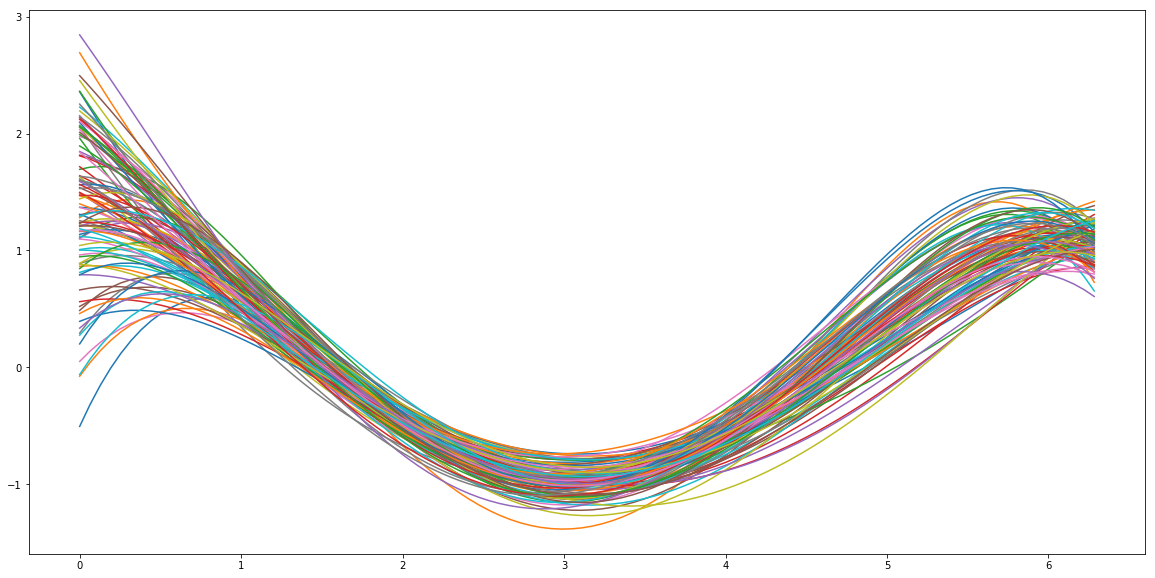

In [25]:
np.random.seed(30)

N = 10
M = 4
alpha = 1/2
beta = 1/(0.2**2)

#generate data points
x,t = gen_cosine2(N)

#create x for plotting
x_p = np.linspace(0, (2* math.pi), num = 100, endpoint = True);

#find posterior mean and variance for the Mth order polynomial
m, S, _ = fit_polynomial_bayes(x, t, M, alpha, beta);


for i in range(0,100):
    #The posterior distribution is Gaussian with mean m and variance S. (Since the prior is Gaussian, 
    #then the posterior is also Gaussian.) Also, since we have mean and covariance matrix, we use
    #multivariate normal distribution
    
    #we obtain the parameters w
    w = np.random.multivariate_normal(m,S)
    
    #We use these parameters to create 100 polynomials
    p=[poly(i,M,w) for i in x_p]
    plt.plot(x_p,p)




### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?



We know that the standard deviation of $\textbf{t}$ is $\sigma = 0.2$ (question 1.1). Since $\beta$ is the precision, which is defined as the inverse of the variance, the best choice for this parameter is: $\beta = \frac{1}{\sigma^2} = \frac{1}{0.2^2}$, because in this case we use for our Bayesian polynomial regression model, the $\textit{real}$ variance of the distribution from which our data points were generated.

b) (5 points) What problems do we face when it comes to choosing basis functions in linear models?

One problem arises from the assumption that the basis functions are fixed before the training set is observed, something that means that we need to handcraft these basis functions, by looking into our data. In other words, we must specify the number and the form of the basis functions in order to determine the overall behaviour of our model. If we don't build them in the correct way, then we might lead to wrong conclusions. 

Another problem is that the number of basis functions must increase with the dimensionality $D$ of the input space (curse of dimensionality). In other words, in order to cover growing dimensions $D$ of input vectors, the number of basis functions needs to grow exponentially.

Moreover, since there is a large pool of basis functions to choose from, we need to know which is the most appropriate function for the problem at hand. If we do not choose an appropriate basis functions, then the modeling becomes more difficult. One example, is that we might end up with a model that does not generalize well, which is something undesirable.